# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"
## LGMVIP Aug-22
## Ayush Dilip Padvekar
## Task 5- Exploratory Data Analysis on Dataset - Terrorism
This is a publically available dataset, and as a part of LetsGrowMore Internship, I have worked on this dataset to build a model that can predict the groups responsible for an attack given the information about the attack like attack-type, weapons used, description of attack, location etc. This notebook showcases the step-by-step approach to the problem including visualization and developing the predictive model.

Dataset Link: https://bit.ly/2TK5Xn5

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
from PIL import Image
import re
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

### Importing Dataset

In [6]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',  encoding="ISO-8859-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Unknown Class values

In [11]:
len(data[data['gname']=='Unknown'])/len(data)*100

45.561970598433604

### Distribution of Classes

In [13]:
len(data['gname'].unique())

3537

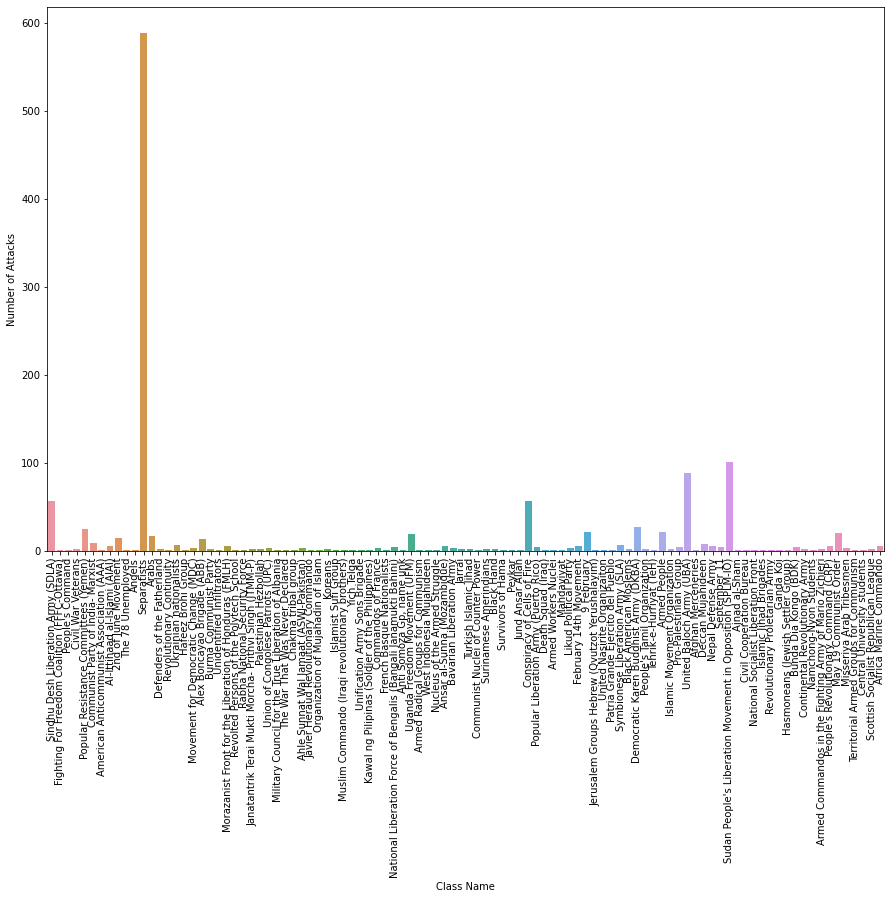

In [14]:
plt.subplots(figsize=(15,10))
classes = data['gname'].value_counts(sort=True)
sample_classes = classes.sample(n=100)
sns.barplot(sample_classes.index,sample_classes)
plt.xlabel('Class Name')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [15]:
threshold = 450
class_freq = data[data['gname']!= 'Unknown']['gname'].value_counts()
class_freq[threshold]

15

### Data Cleaning

In [16]:
data = data[data['gname']!='Unknown']

In [17]:
def cleaning(data,threshold):
    le = LabelEncoder()
    class_freq = data[data['gname']!='Unknown']['gname'].value_counts()  # To find frequency of each class
    data['weaptype1_txt'] = data['weaptype1_txt'].apply(lambda x: 'Vehicle' if x=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x) #To remove all rows having vehicle as a cause of attack 
    data = data[data['gname']!='Unknown'] # Remove "Unknown" groups since they add no significant value to the dataset
    data['provstate'] = data.apply(lambda row: row['city'] if pd.isnull(row['provstate']) else row['provstate'], axis=1)
    data = data.loc[:,data.columns[[1,2,3,5,7,9,11,13,14,16,19,20,21,22,28,34,58,81]]] # Selecting the required feature columns only
    data = data[(data.crit1==1) & (data.crit2==1) & (data.crit3 ==1) & (data.doubtterr==0)] # Only keeping rows where we know for surely, a terrorist attack happened 
    data = data[data['gname'].isin(class_freq.index[:threshold])] # Removing rows where the frequency value if less than threshold
    data = data.sample(frac=1) # Dataset Randomization
    data = data.dropna() # Dropping null values across the dataset
    data['provstate'] = le.fit_transform(data['provstate']) # Transforming all state values
    data['gname'] = le.fit_transform(data['gname']) # Transforming all classes
    y = data['gname'] # Creating y subset
    data = data.drop('gname',axis=1) # Dropping the gname column from the main dataset for X_train creation
    X_train = data[:round(0.85*len(data))] # Train-test split process
    y_train = y[:round(0.85*len(data))]
    X_test = data[round(0.85*len(data)):]
    y_test = y[round(0.85*len(data)):]
    return X_train, y_train, X_test, y_test

In [18]:
X_train, y_train, X_test, y_test = cleaning(data,threshold)

### Exploratory Data Analysis

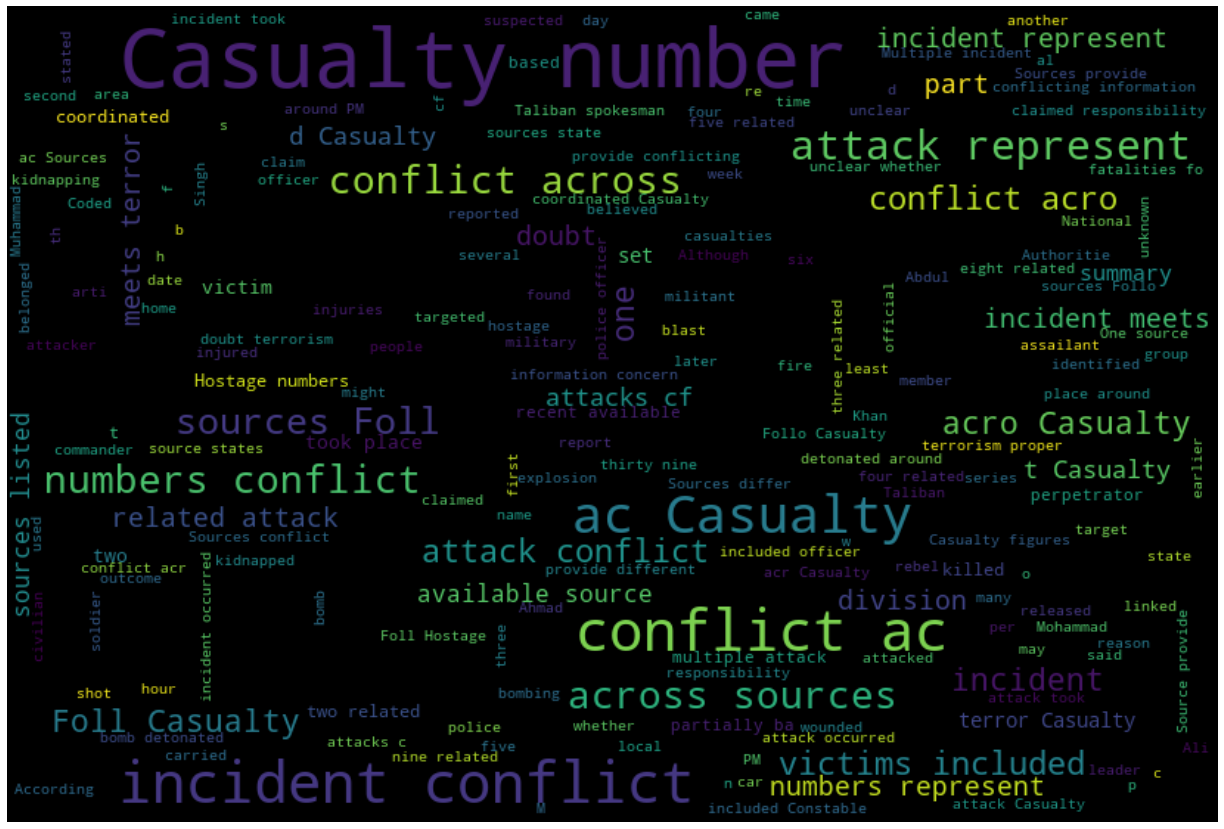

In [21]:
wordcloud_bg = np.array(Image.open('waroftheworldswordle.jpg'))
td = data['addnotes']
def wordcloud_creation(td):
    td = td.dropna() # Dropping empty rows
    td = td.to_string() # Converting everything in addnotes column to string to make it printable
    td = re.sub(' +',' ', td)
    final_result = WordCloud(mask=wordcloud_bg).generate(td)
    plt.figure(figsize=(30,15))
    plt.imshow(final_result, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0,y=0)
    plt.show()
wordcloud_creation(td)

### Worldmap, Number of Attacks in the year 2017

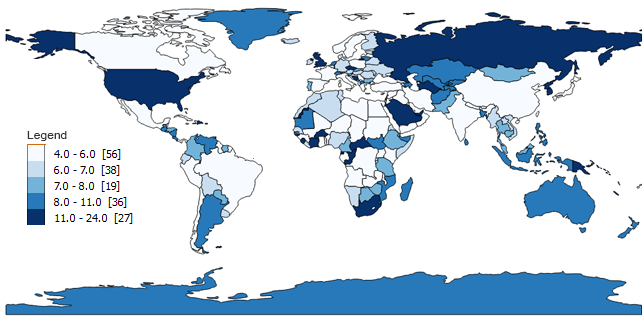

In [22]:
def wmap(data,yr):
    ds = data[data['iyear']==yr]
    ds_sub = pd.DataFrame(ds.groupby(['country_txt'])['country_txt'].count())
    ds_sub.columns = ['count']
    ds_sub.reset_index(inplace=True)
    fig = px.choropleth(ds_sub, locations='country_txt', locationmode='country names', color='count',color_continuous_scale="viridis")
    fig.update_layout(autosize=False, height=500, width=800)
    pio.write_image(fig, f'choropleth_{yr}.png')
wmap(data,2017)
from IPython.display import Image
Image('Quantile-Choropleth-Map-1.png')

### Total Kills Globally in the Given Timeframe

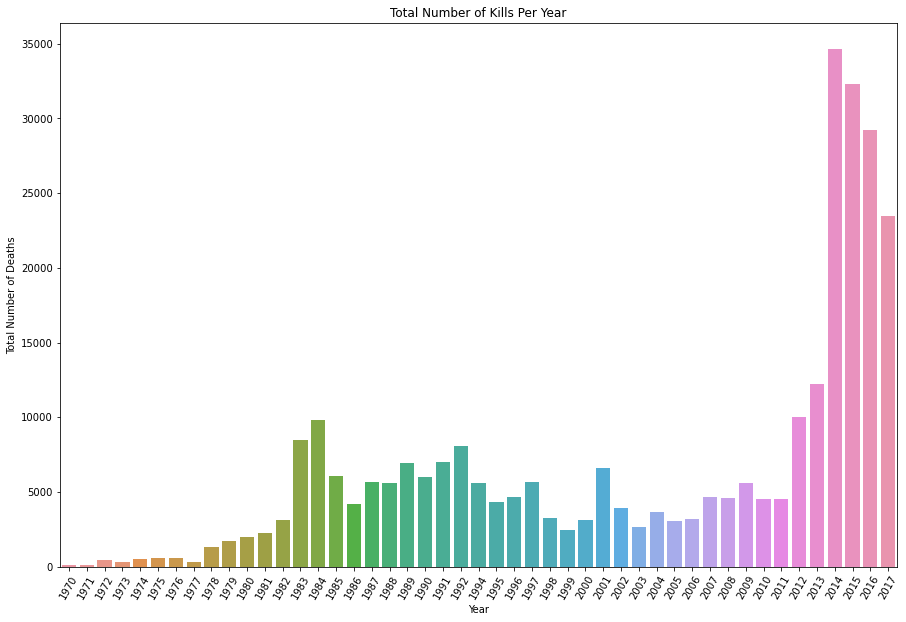

In [23]:
data['nkill'].fillna(0) # Filling missing values in kills column with 0
total_kills = data.groupby('iyear')['nkill'].sum() # Finding total kills/year
plt.subplots(figsize=(15,10))
plot1 = sns.barplot(total_kills.index, total_kills)
plot1.set_xlabel('Year')
plot1.set_ylabel('Total Number of Deaths')
plot1.set_xticklabels(total_kills.index, rotation=60)
plot1.set_title('Total Number of Kills Per Year')
plt.show()

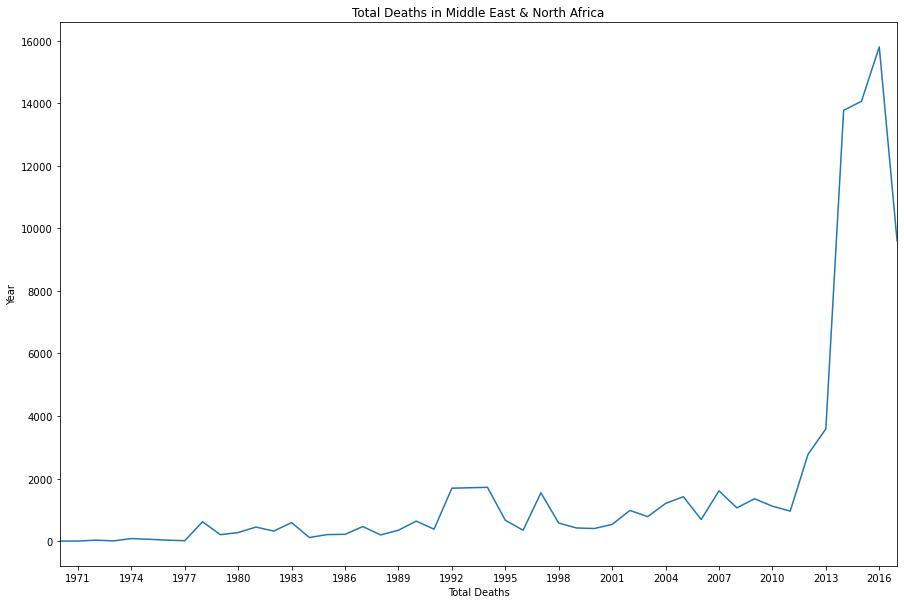

In [24]:
import matplotlib.ticker as ticker
plt.subplots(figsize=(15, 10))
ds_sub1 = data[data['region_txt']=='Middle East & North Africa']
df_new = pd.DataFrame(ds_sub1.groupby(['iyear'])['nkill'].sum())
df_new.reset_index(inplace=True)
df_new['dummy']=0
pr = sns.lineplot(x='iyear', y='nkill', data=df_new)
pr.set_xlabel('Total Deaths')
pr.set_ylabel('Year')
pr.set_title('Total Deaths in Middle East & North Africa')
pr.xaxis.set_major_locator(ticker.MultipleLocator(3))
pr.set_xlim(1970,2017)
plt.show(pr)

### Top 10 Notorious Terrorist Outfits

In [25]:
terror_10 = pd.DataFrame(data.groupby(['gname'])['nkill'].count().sort_values(ascending=False).head(10))
terror_10

,nkill
gname,
Taliban,7200
Islamic State of Iraq and the Levant (ISIL),5066
Shining Path (SL),4078
New People's Army (NPA),2693
Al-Shabaab,2669
Farabundo Marti National Liberation Front (FMLN),2564
Irish Republican Army (IRA),2524
Revolutionary Armed Forces of Colombia (FARC),2367
Kurdistan Workers' Party (PKK),2273


In [26]:
def notorious_10(data):    
    ds_new = pd.DataFrame(data.groupby(['gname','iyear'])['iyear'].count())
    ds_new.columns=['Number_of_Attacks']
    ds_new.reset_index(inplace=True)
    ds_sub2 = ds_new.loc[ds_new['gname'].isin(data['gname'].value_counts().sort_values(ascending=False).index[:10])]
    ds_sub2 = ds_sub2.pivot(index='gname',columns='iyear',values='Number_of_Attacks').fillna(0)
    ds_sub2 = pd.DataFrame(ds_sub2.unstack(level=0))
    ds_sub2.reset_index(inplace=True)
    ds_sub2.columns=['Year','Terrorist Group','Number of Attacks']
    ds_sub2['dummy']=0
    plt.subplots(figsize=(15,10))
    plt_terror = sns.lineplot(x='Year',y='Number of Attacks',hue='Terrorist Group',data=ds_sub2,units='dummy',estimator=None)
    plt_terror.xaxis.set_major_locator(ticker.MultipleLocator(3))
    plt_terror.set_xlim(1970,2017)
    plt.show()

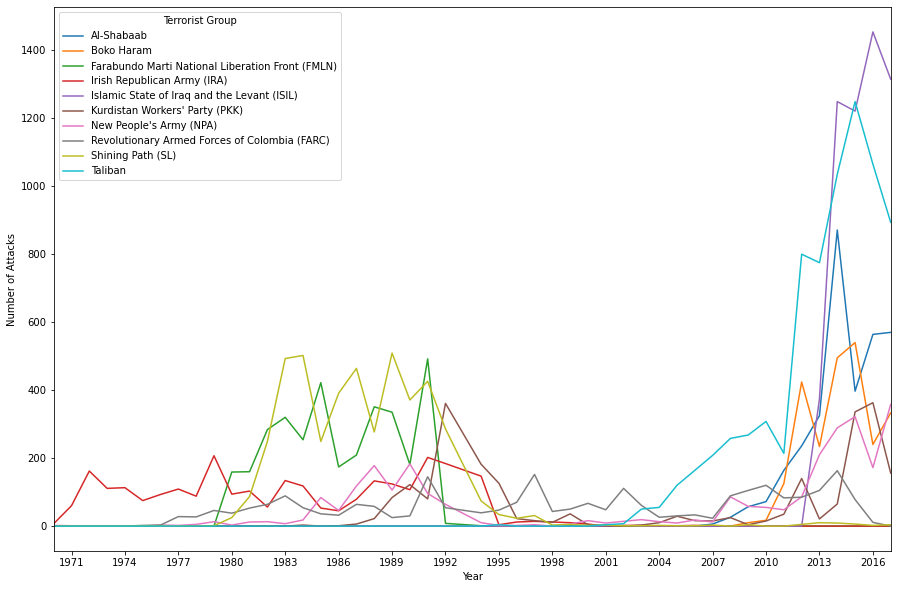

In [27]:
notorious_10(data)

### Interesting Insight into Taliban's Attacks

In [29]:
def monthly_attacks(data,gname,year):
    ds_sub3 = data[(data['gname']==gname) & (data['iyear']==year)]
    monthly_attacks = ds_sub3.groupby(['imonth'])['nkill'].sum()
    qrs = pd.Series([sum(monthly_attacks.iloc[0:3]),
                          sum(monthly_attacks.iloc[3:6]),
                          sum(monthly_attacks.iloc[6:9]), 
                          sum(monthly_attacks[9:12])],
                          index=[1,2,3,4])
    plot2 = sns.barplot(qrs.index, qrs)
    plot2.set_xlabel('Quarters')
    plot2.set_ylabel('Number of Attacks')
    plot2.set_title(gname + "in "+ str(year))
    plt.show()

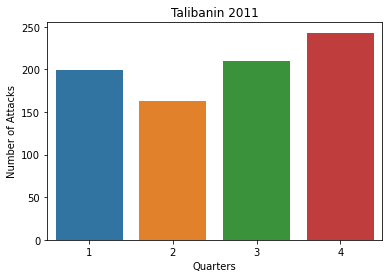

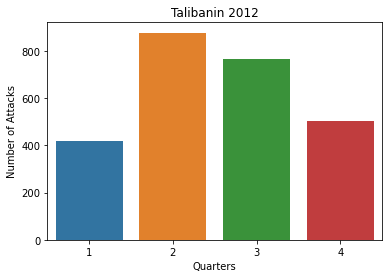

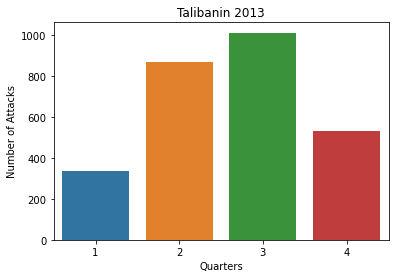

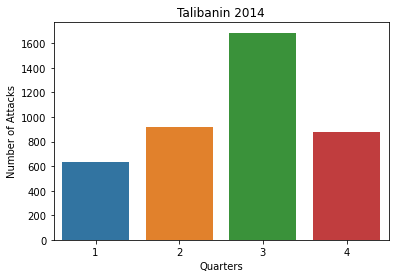

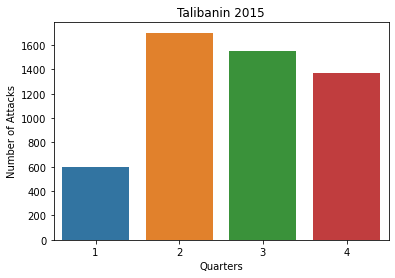

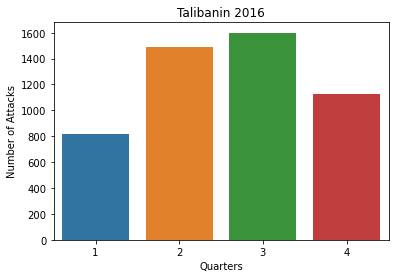

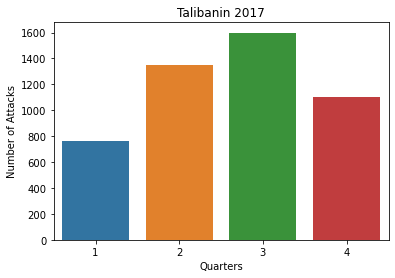

In [30]:
for i in range(2011, 2018):
    monthly_attacks(data, 'Taliban', i)

### Regional Attack Frequency

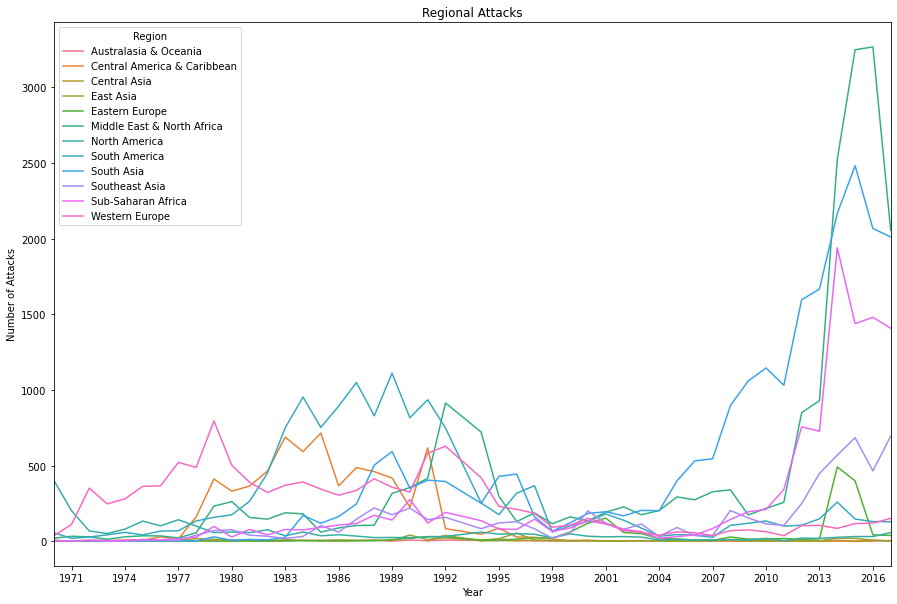

In [31]:
def regions_affected(data):
    ds_temp = data.groupby(['region_txt','iyear'])['iyear'].count()
    ds_sub4 = pd.DataFrame(ds_temp)
    ds_sub4.reset_index(level=0,inplace=True)
    ds_sub4.columns = ['Region', 'Number of Attacks']
    ds_sub4.reset_index(level=0,inplace=True)
    ds_sub4['dummy'] = 0
    plt.subplots(figsize=(15,10))
    plt_region = sns.lineplot(x='iyear', y='Number of Attacks',hue='Region',data=ds_sub4,units='dummy', estimator=None)
    plt_region.set_xlabel('Year')
    plt_region.set_title('Regional Attacks')
    plt_region.xaxis.set_major_locator(ticker.MultipleLocator(3))
    plt_region.set_xlim(1970,2017)
    plt.show()
regions_affected(data)

### Weapon Preferences of Each Outfit

In [32]:
def weapon_pref(data,gname):
    w_pref = pd.DataFrame(data[data['gname']==gname]['weaptype1_txt'].value_counts())
    w_pref.reset_index(level=0, inplace=True)
    plt.subplots(figsize=(20,15))
    plot_weap = squarify.plot(sizes=w_pref['weaptype1_txt'],label=w_pref['index'])
    plot_weap.set_title(f'{gname} Weapon Preferences')
    plt.show()

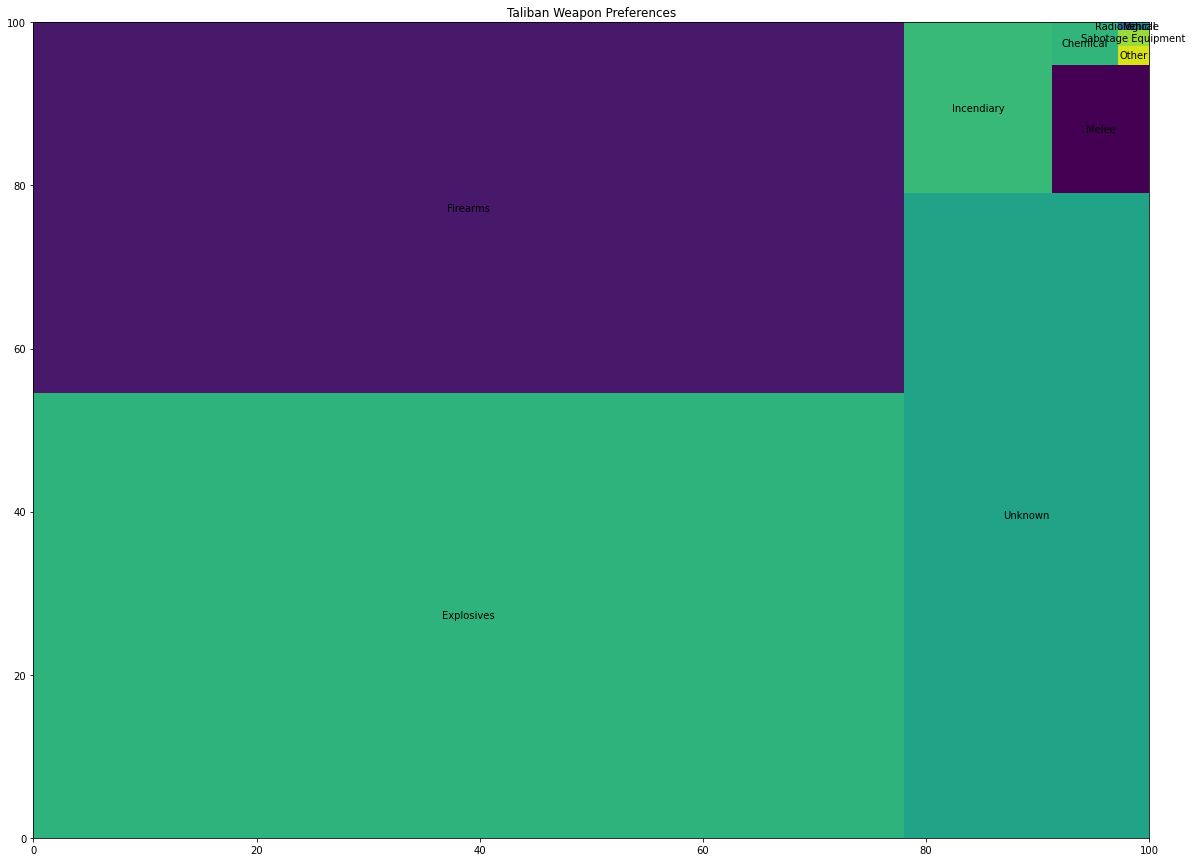

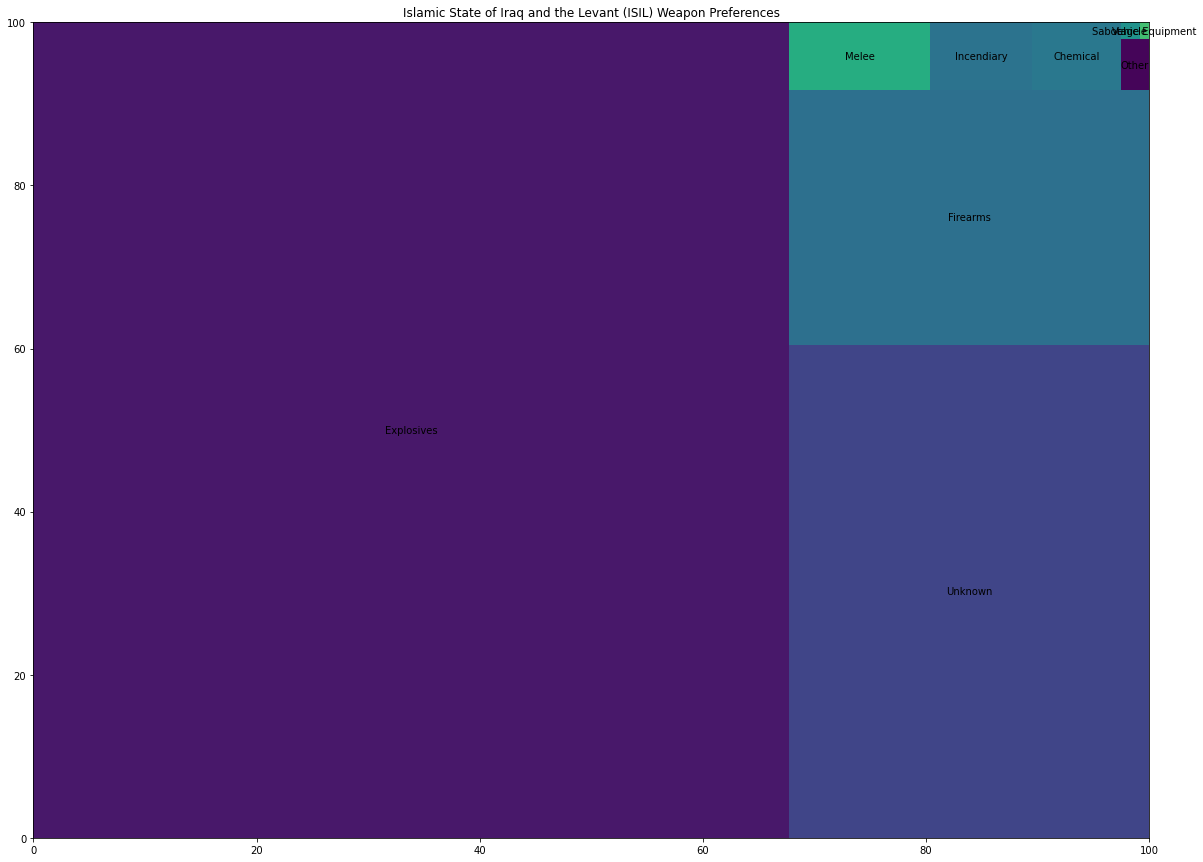

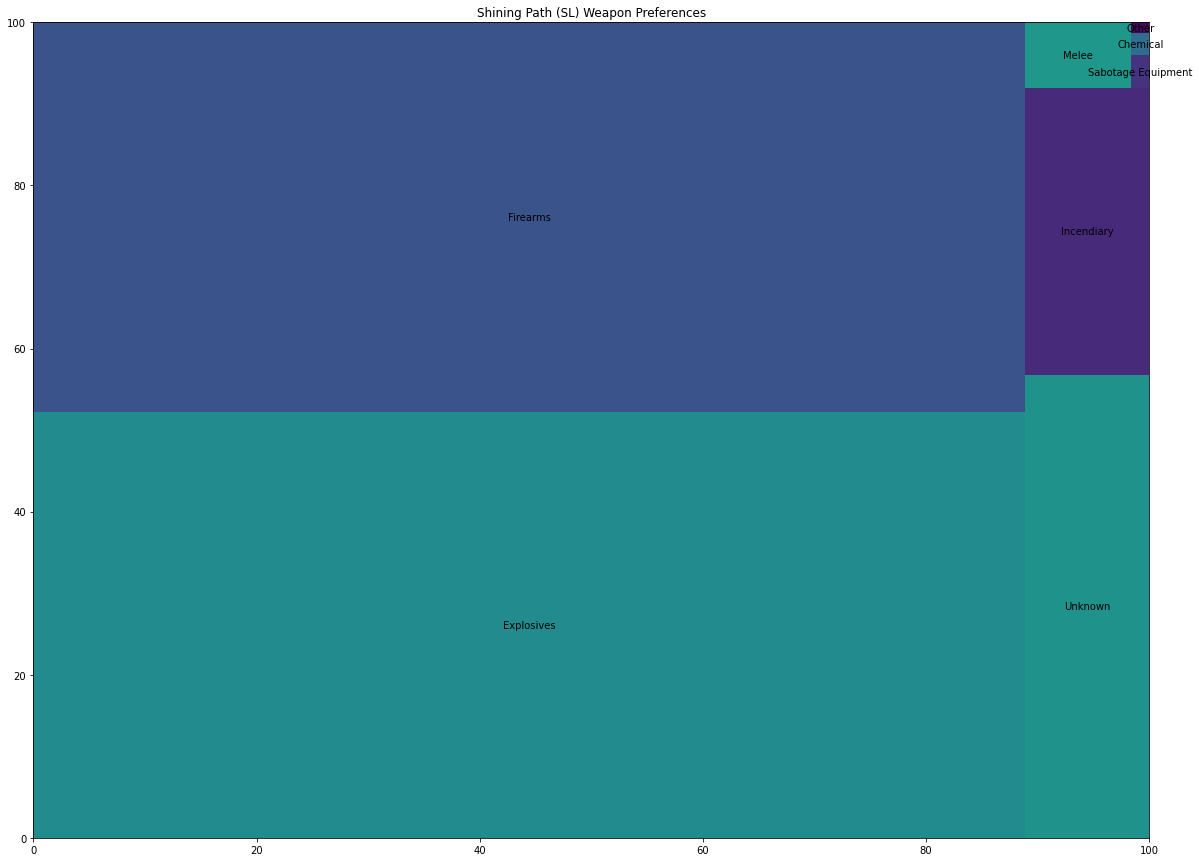

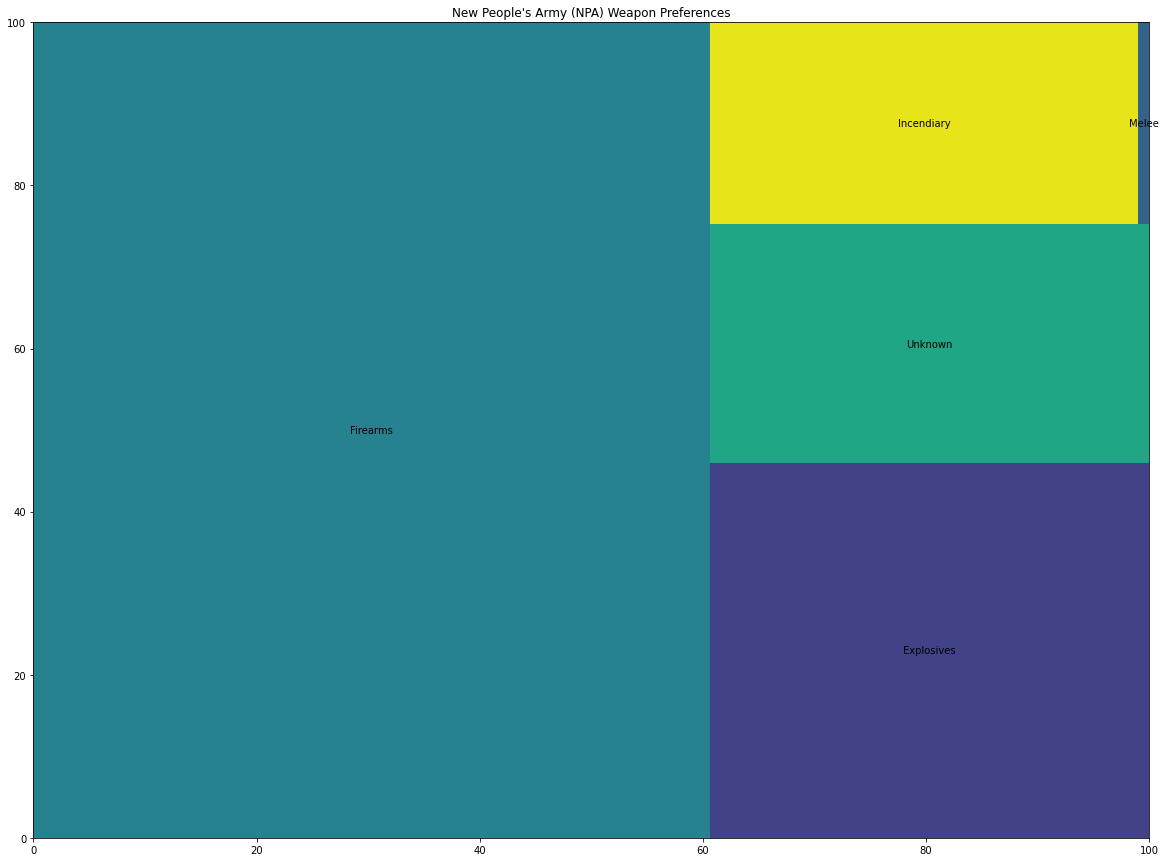

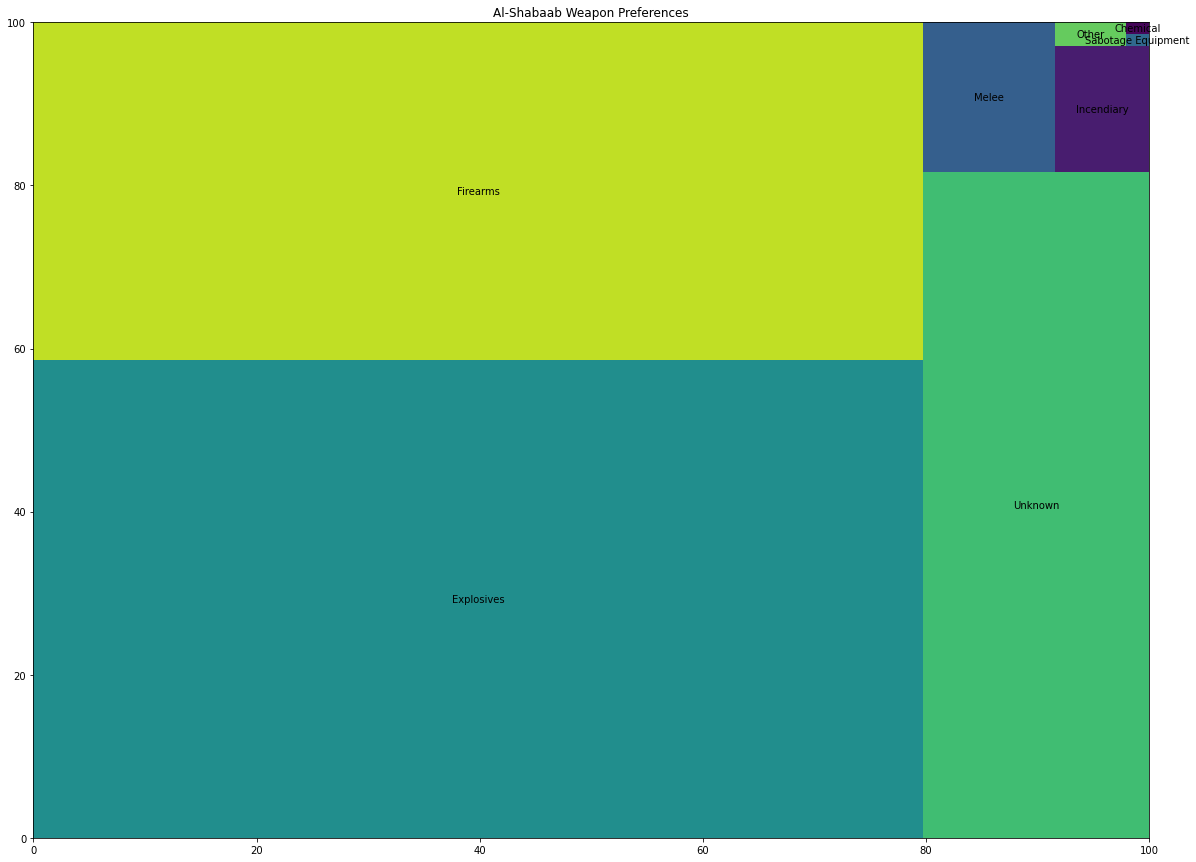

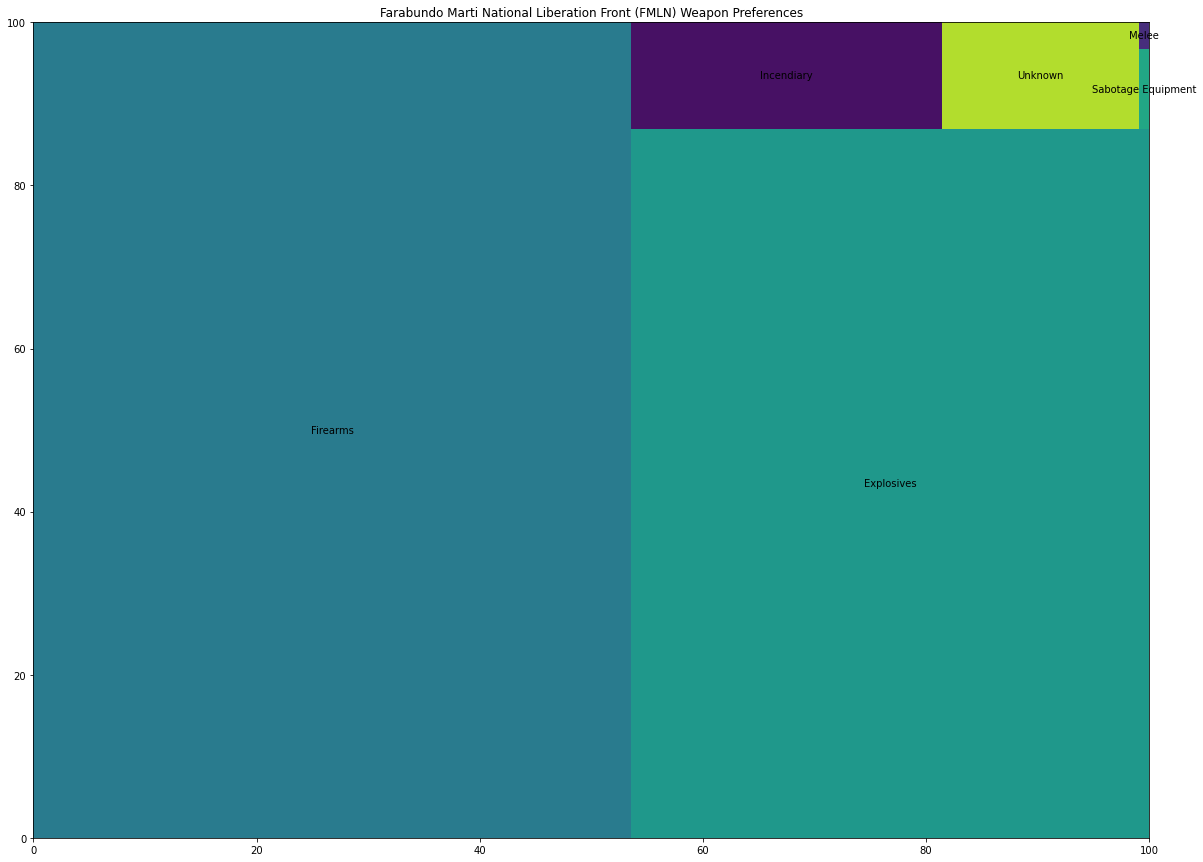

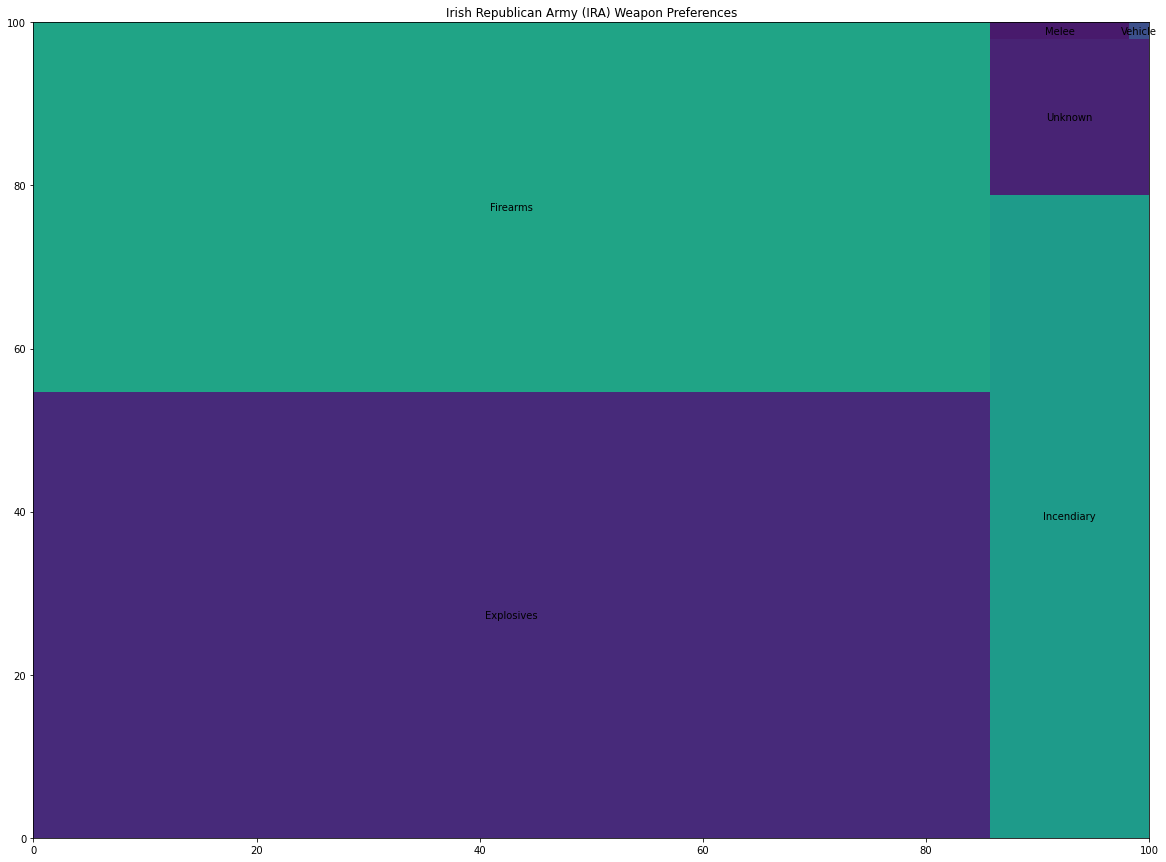

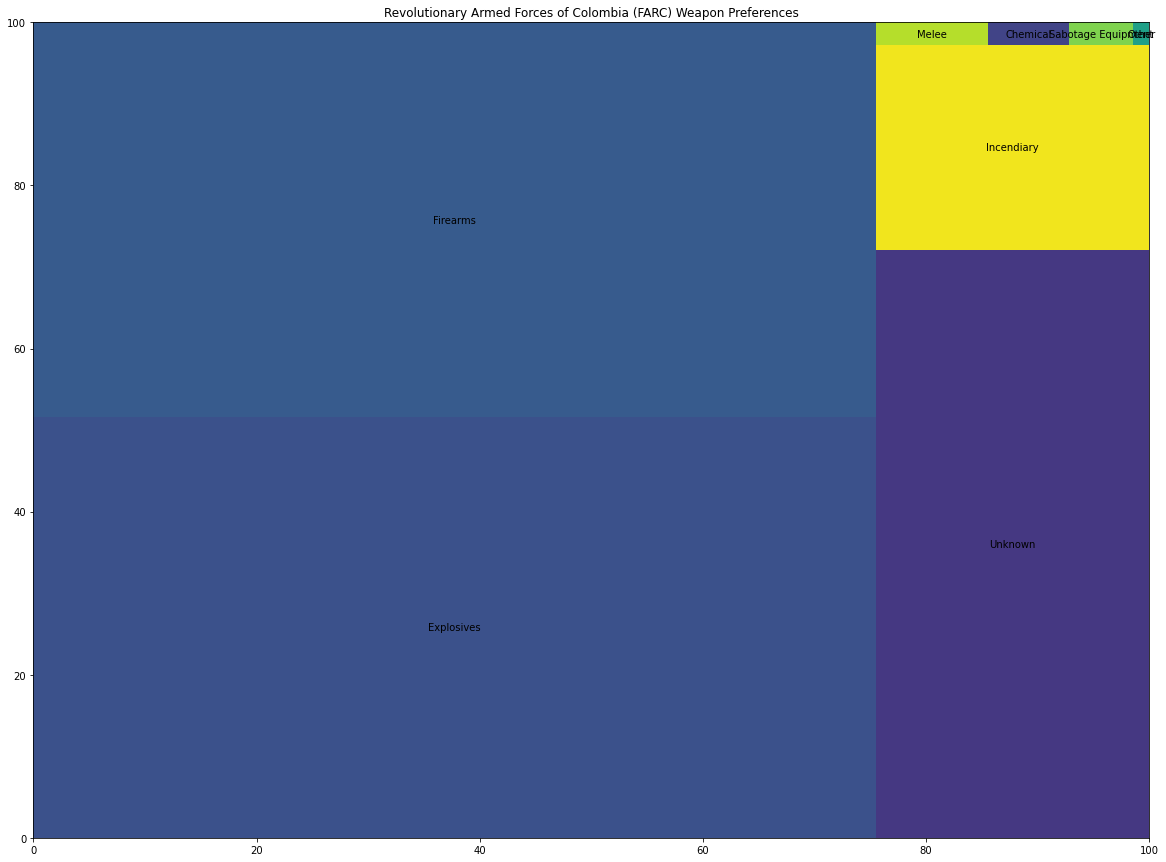

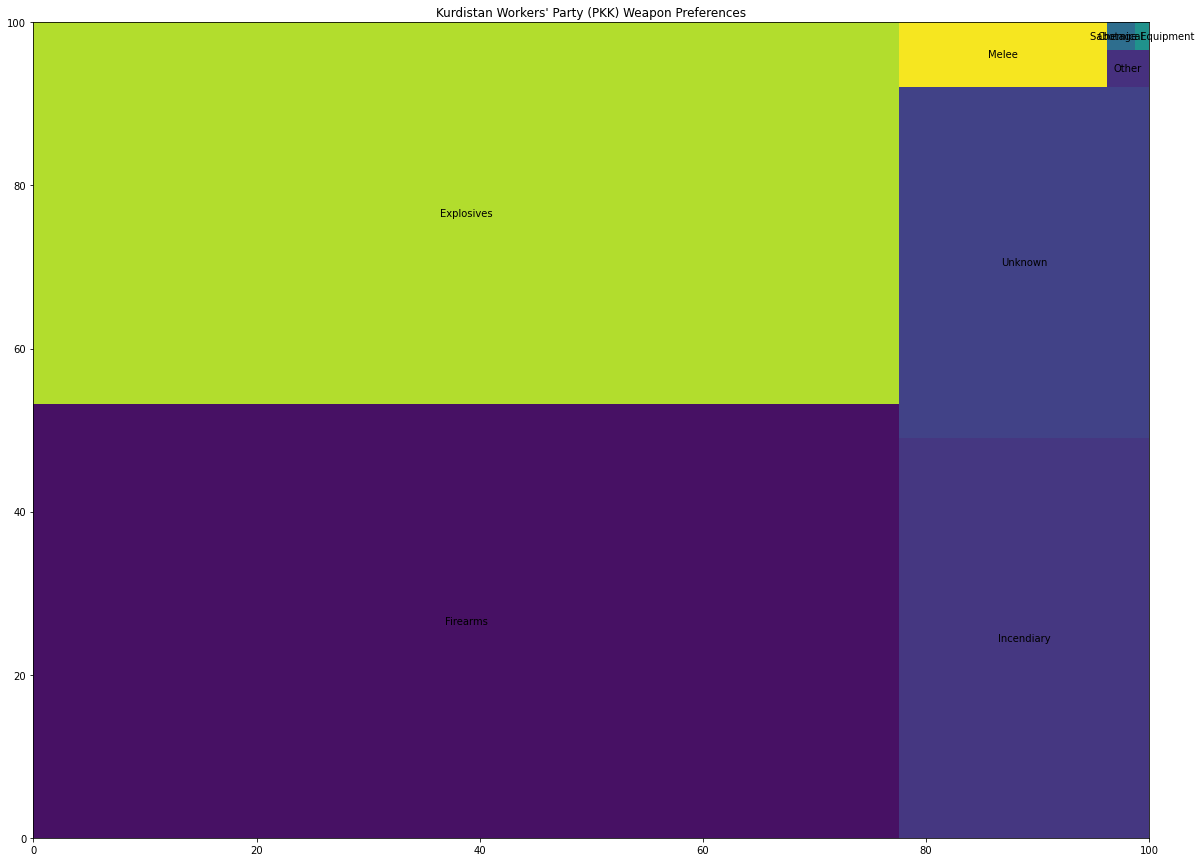

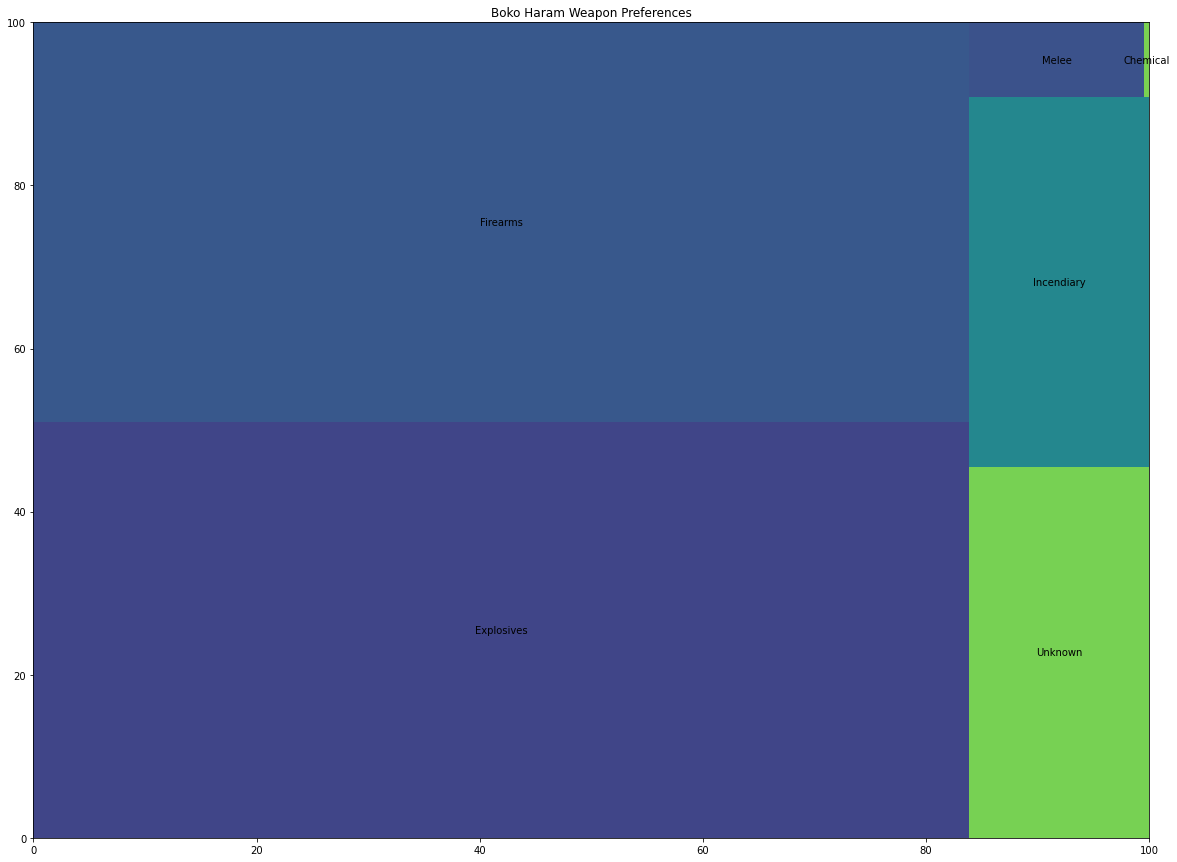

In [33]:
t_10 = terror_10.index
t_10
for i in t_10:
    weapon_pref(data,i)

### Countrywise Statistics

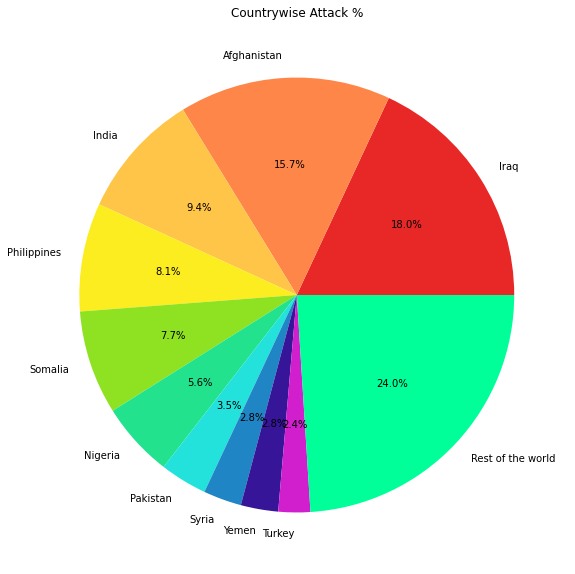

In [34]:
def country_attacks(data,year):
    ds_sub5 = pd.DataFrame(data[data['iyear']==year]['country_txt'].value_counts(sort=True)[:10])
    ds_sub5.reset_index(inplace=True)
    ds_sub5.columns = ['country_txt','Total Attacks']
    addn = ['Rest of the world',sum(data[data['iyear']==year]['country_txt'].value_counts(sort=True)) - sum(data[data['iyear']==year]['country_txt'].value_counts(sort=True)[:10])]
    ds_sub5.loc[len(ds_sub5)] = addn
    color_palatte = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
    plt.subplots(figsize=(10,10))
    plt.pie(ds_sub5['Total Attacks'],labels=ds_sub5['country_txt'], autopct='%.1f%%', colors=color_palatte)
    plt.title('Countrywise Attack %')
    plt.show()
country_attacks(data,2017)

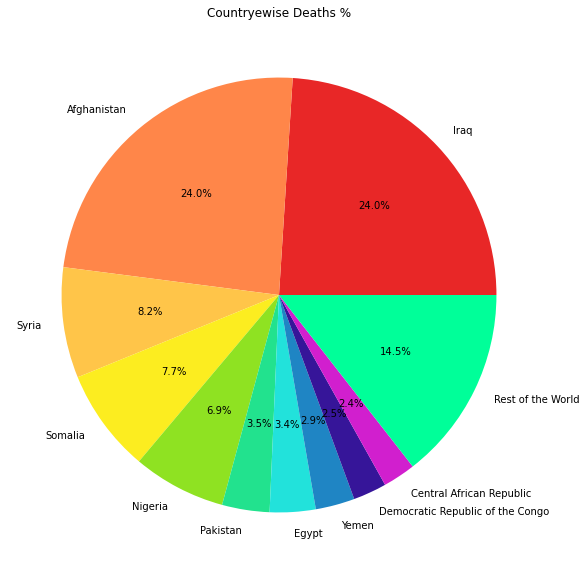

In [35]:
def country_deaths(data,year):
    d_temp = data[data['iyear']==year]
    ds_sub6 = pd.DataFrame(d_temp.groupby('country_txt')['nkill'].sum().sort_values(ascending=False)[:10])
    ds_sub6.reset_index(inplace=True)
    addn = ['Rest of the World', (d_temp['nkill'].sum() - ds_sub6['nkill'].sum())]
    ds_sub6.loc[len(ds_sub6)] = addn
    color_palatte = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
    plt.subplots(figsize=(10,10))
    plt.pie(ds_sub6['nkill'],labels=ds_sub6['country_txt'], autopct='%.1f%%', colors=color_palatte)
    plt.title('Countryewise Deaths %')
    plt.show()
country_deaths(data,2017)

### Most Dangerous Country

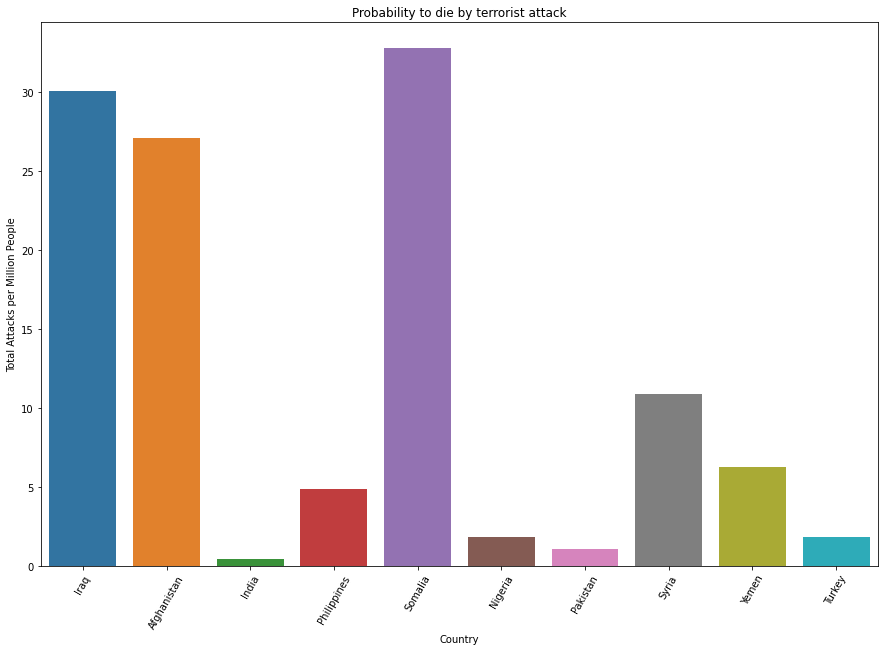

In [36]:
plt.subplots(figsize=(15,10))
d_temp = data[data['iyear']==2017]
countries = pd.DataFrame(d_temp['country_txt'].value_counts()[:10])
countries.reset_index(inplace=True)
countries.columns=['Country', 'Total Attacks per Million People']
# Prepared a series manually, finding the populations of all top 10 countries
p = pd.Series([39309783, 38041754, 1366417754, 108116615, 15442905, 200963599, 216565318, 17070135, 29161922, 83429615])
countries['Total Attacks per Million People'] = countries['Total Attacks per Million People']/p*1000000
prob_plot = sns.barplot(countries['Country'],countries['Total Attacks per Million People'], data=countries)
prob_plot.set_xticklabels(countries['Country'], rotation=60)
prob_plot.set_title('Probability to die by terrorist attack')
plt.show()

### Reasoning behind the findings

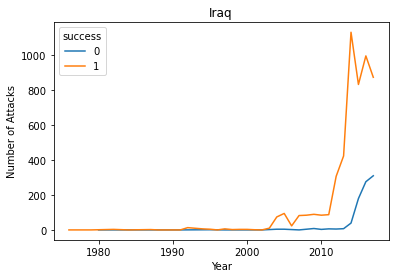

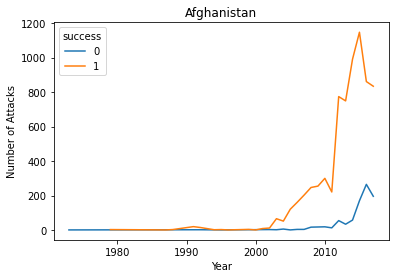

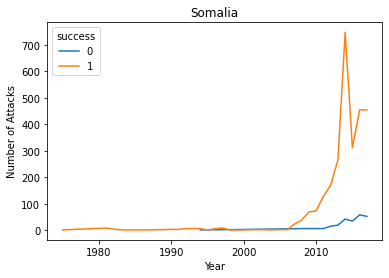

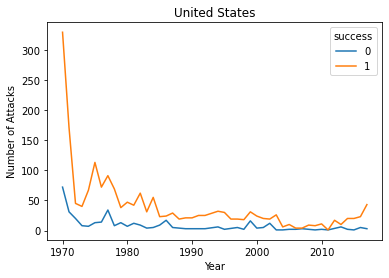

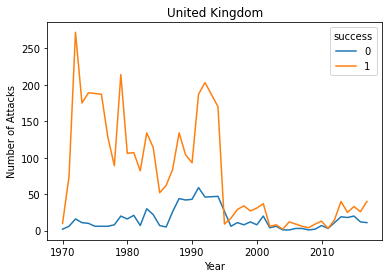

In [37]:
def reason(data,country):
    ds_temp = data[data['country_txt']==country]
    ds_sub7 = pd.DataFrame(ds_temp.groupby(['iyear','success'])['iyear'].count())
    ds_sub7.columns=['count']
    ds_sub7.reset_index(inplace=True)
    ds_sub7["dummy"]=0
    plot_r = sns.lineplot(x='iyear', y='count', hue='success', data=ds_sub7, units='dummy', estimator=None)
    plot_r.set_title(country)
    plot_r.set_ylabel("Number of Attacks")
    plot_r.set_xlabel("Year")
    plt.show()
    
plt_countries =['Iraq','Afghanistan','Somalia','United States','United Kingdom']
for i in plt_countries:
    reason(data,i)

### Predicting Groups Responsible for Attacks

In [38]:
rf = RandomForestClassifier(class_weight='balanced')
dtc = DecisionTreeClassifier(criterion="entropy")
def predict(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return f1_score(y_test, pred, average='micro')

In [41]:
print ("We removed",round((sum(class_freq) - sum(class_freq[:threshold]))/sum(class_freq)*100,2),"% of data as outliers. Below are prediction scores,it will decrease as we increase the threshold value (or include classes with less frequency in data)")

We removed 8.07 % of data as outliers. Below are prediction scores,it will decrease as we increase the threshold value (or include classes with less frequency in data)


In [42]:
print ("F1-Score by Random Forest, threshold =",threshold ,":" ,predict(rf,X_train, y_train, X_test, y_test))

F1-Score by Random Forest, threshold = 450 : 0.8488315718025794


In [43]:
print ("F1-Score by Decision Tree, threshold =",threshold ,":" ,predict(dtc,X_train, y_train, X_test, y_test))

F1-Score by Decision Tree, threshold = 450 : 0.8178997381945118


### 2. Increasing it to see changes in prediction score

In [44]:
threshold = 800
X_train, y_train, X_test, y_test = cleaning(data, threshold)

In [45]:
print ("We removed",round((sum(class_freq) - sum(class_freq[:threshold]))/sum(class_freq)*100,2),"% of data as outliers. Below are prediction scores,it will decrease as we increase the threshold value (or include classes with less frequency in data)")

We removed 4.79 % of data as outliers. Below are prediction scores,it will decrease as we increase the threshold value (or include classes with less frequency in data)


In [46]:
print ("F1-Score by Random Forest, threshold =",threshold ,":" ,predict(rf,X_train, y_train, X_test, y_test))

F1-Score by Random Forest, threshold = 800 : 0.8314470115050043


In [47]:
print ("F1-Score by Decision Tree, threshold =",threshold ,":" ,predict(dtc,X_train, y_train, X_test, y_test))

F1-Score by Decision Tree, threshold = 800 : 0.8008605369001964


### Finding the importance of each feature for a better a prediction of target group

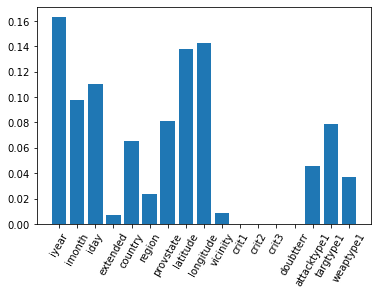

In [48]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=60)
plt.show()